In [2]:
#!/usr/bin/env python
# coding: utf-8

#pip install nltk
#import nltk
#nltk.download('all')
#nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizerd
#nltk.download('stopwords')
#import lib
import os
import sys
sys.path
import numpy as np
np.__path__
import pandas as pd
pd.__path__
import seaborn as sns #visualisation
sns.__path__
import matplotlib as plt #visualisation
plt.__path__
# importing matplotlib module 
from matplotlib import pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(color_codes=True)
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator




In [3]:

#Load Dataset
df = pd.read_csv("ITSalarySurveyEU.csv")
df


,Unnamed: 0,timestamp,age,gender,city,position,total_years_of_experience,years_of_experience_in_germany,seniority_level,technical_language,...,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country),vacation_days,employment_status,contract_duration,main_language,company_size,company_type,lost_job
0,0,24-11-2020,26,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,...,5000.0,75000.0,10000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,1,24-11-2020,29,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,...,120000.0,100000.0,100000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
2,2,24-11-2020,32,Male,Berlin,DevOps,5.0,1.0,Senior,"AWS, GCP, Python,K8s",...,5000.0,76000.0,5000.0,30,Full-time employee,Unlimited contract,English,Nov-50,Startup,No
3,3,24-11-2020,34,Male,Berlin,Mobile Developer,11.0,5.0,Lead,kotlin,...,80000.0,75000.0,75000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
4,4,24-11-2020,38,Male,Berlin,Team Lead,18.0,4.0,Lead,iOS,...,4000.0,80000.0,2000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,489,12-01-2021,37,Male,Berlin,Mobile Developer,15.0,5.0,Senior,Android,...,1000.0,83000.0,3500.0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No
490,490,16-01-2021,32,Male,Munich,Software Engineer,10.0,5.0,Head,Scala,...,NaN,80000.0,NaN,24,Full-time employee,Unlimited contract,English,Nov-50,Startup,No
491,491,18-01-2021,31,Male,Berlin,Backend Developer,9.0,5.0,Senior,Java,...,72000.0,70000.0,72000.0,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes
492,492,19-01-2021,26,Male,SaarbrÃ¼cken,Frontend Developer,7.0,7.0,Middle,JavaScript,...,40950.0,33800.0,36400.0,27,Full-time employee,Unlimited contract,German,101-1000,Product,No


In [3]:

# To display the top 5 rows
df.head(5)



,Unnamed: 0,timestamp,age,gender,city,position,total_years_of_experience,years_of_experience_in_germany,seniority_level,technical_language,...,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country),vacation_days,employment_status,contract_duration,main_language,company_size,company_type,lost_job
0,0,24-11-2020,26,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,...,5000.0,75000.0,10000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,1,24-11-2020,29,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,...,120000.0,100000.0,100000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
2,2,24-11-2020,32,Male,Berlin,DevOps,5.0,1.0,Senior,"AWS, GCP, Python,K8s",...,5000.0,76000.0,5000.0,30,Full-time employee,Unlimited contract,English,Nov-50,Startup,No
3,3,24-11-2020,34,Male,Berlin,Mobile Developer,11.0,5.0,Lead,kotlin,...,80000.0,75000.0,75000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
4,4,24-11-2020,38,Male,Berlin,Team Lead,18.0,4.0,Lead,iOS,...,4000.0,80000.0,2000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,Yes


In [4]:

# To display the bottom 5 rows
df.tail(5) 


,Unnamed: 0,timestamp,age,gender,city,position,total_years_of_experience,years_of_experience_in_germany,seniority_level,technical_language,...,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country),vacation_days,employment_status,contract_duration,main_language,company_size,company_type,lost_job
489,489,12-01-2021,37,Male,Berlin,Mobile Developer,15.0,5.0,Senior,Android,...,1000.0,83000.0,3500.0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No
490,490,16-01-2021,32,Male,Munich,Software Engineer,10.0,5.0,Head,Scala,...,NaN,80000.0,NaN,24,Full-time employee,Unlimited contract,English,Nov-50,Startup,No
491,491,18-01-2021,31,Male,Berlin,Backend Developer,9.0,5.0,Senior,Java,...,72000.0,70000.0,72000.0,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes
492,492,19-01-2021,26,Male,SaarbrÃ¼cken,Frontend Developer,7.0,7.0,Middle,JavaScript,...,40950.0,33800.0,36400.0,27,Full-time employee,Unlimited contract,German,101-1000,Product,No
493,493,19-01-2021,26,Male,Berlin,DevOps,2.0,2.0,Middle,yaml,...,6500.0,40000.0,NaN,30,Full-time employee,Unlimited contract,English,51-100,Startup,No


In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 22 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Unnamed: 0                                                                     494 non-null    int64  
 1   timestamp                                                                      494 non-null    object 
 2   age                                                                            494 non-null    int64  
 3   gender                                                                         494 non-null    object 
 4   city                                                                           494 non-null    object 
 5   position                                                                       494 non-null    object 
 6   total_years_of_experience 

In [6]:
df.describe()

,Unnamed: 0,age,total_years_of_experience,years_of_experience_in_germany,yearly_brutto_salary,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country)
count,494.000000,494.000000,494.000000,494.000000,494.000000,345.000000,493.000000,319.000000
mean,246.500000,32.925101,9.288057,4.340688,75324.858300,28316.249652,67279.223124,31192.404389
std,142.749781,5.348737,5.692242,3.710260,42015.866759,35783.445320,21406.825148,33498.983196
min,0.000000,22.000000,0.000000,0.000000,12000.000000,12.000000,11000.000000,100.000000
25%,123.250000,29.000000,5.000000,2.000000,60000.000000,5000.000000,55000.000000,5000.000000
50%,246.500000,33.000000,9.000000,3.500000,72000.000000,10000.000000,66000.000000,12000.000000
75%,369.750000,36.000000,13.000000,5.750000,83000.000000,46000.000000,77000.000000,59000.000000
max,493.000000,56.000000,31.000000,30.000000,850000.000000,200000.000000,200000.000000,200000.000000


In [7]:
#Shape of the data
print(f"Rows : {df.shape[0]}")
print(f"Column : {df.shape[1]}")


Rows : 494
Column : 22


In [8]:
#Column Names
print(f"\nAttributes:\n {df.columns.tolist()}")




Attributes:
 ['Unnamed: 0', 'timestamp', 'age', 'gender', 'city', 'position', 'total_years_of_experience', 'years_of_experience_in_germany', 'seniority_level', 'technical_language', 'other_technical_language', 'yearly_brutto_salary', 'bonus+stocks', 'annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country)', 'bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country)', 'vacation_days', 'employment_status', 'contract_duration', 'main_language', 'company_size', 'company_type', 'lost_job']


In [9]:
#Percentage of missing values
print('Percentage of missing values : \n\n', (100*df.isnull().sum()/df.shape[0]).round(2))


Percentage of missing values : 

 Unnamed: 0                                                                        0.00
timestamp                                                                         0.00
age                                                                               0.00
gender                                                                            0.00
city                                                                              0.00
position                                                                          0.00
total_years_of_experience                                                         0.00
years_of_experience_in_germany                                                    0.00
seniority_level                                                                   0.00
technical_language                                                                0.00
other_technical_language                                                          0.00
yearly_br

In [10]:
#Unique Values per column
print('Unique values per column :\n\n',df.nunique())


Unique values per column :

 Unnamed: 0                                                                       494
timestamp                                                                         46
age                                                                               31
gender                                                                             3
city                                                                              68
position                                                                          72
total_years_of_experience                                                         36
years_of_experience_in_germany                                                    26
seniority_level                                                                   10
technical_language                                                               135
other_technical_language                                                         317
yearly_brutto_salary                

In [11]:
#Check for Duplicates
print(f'Percentage of duplicate records: {100-(100*df.drop_duplicates().shape[0]/df.shape[0])}')



Percentage of duplicate records: 0.0


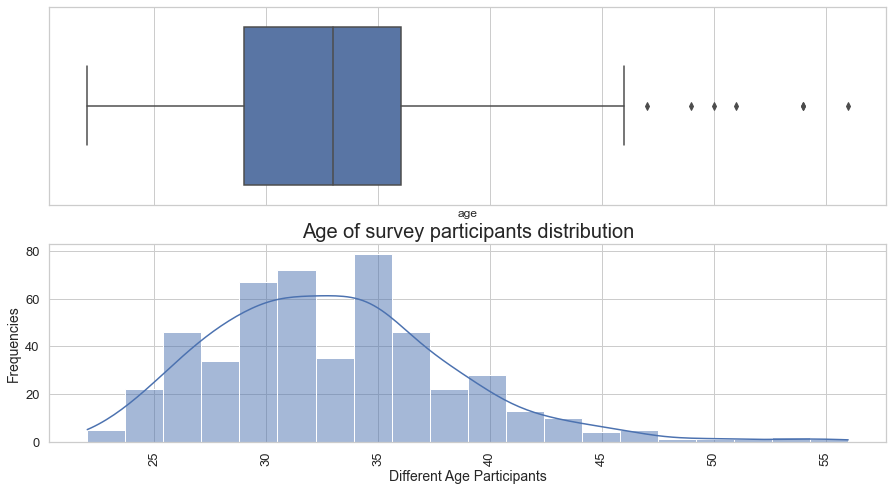

In [30]:
# Age of survey participants distribution
fig, (ax_box,ax_hist) = plt.subplots(2,sharex=True,figsize=(15,8))

sns.boxplot(data=df,x='age',ax=ax_box)
sns.histplot(data=df,x='age',kde=True,ax=ax_hist)
plt.title("Age of survey participants distribution",fontsize=20)
plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Different Age Participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequencies",fontsize=14)
plt.show()

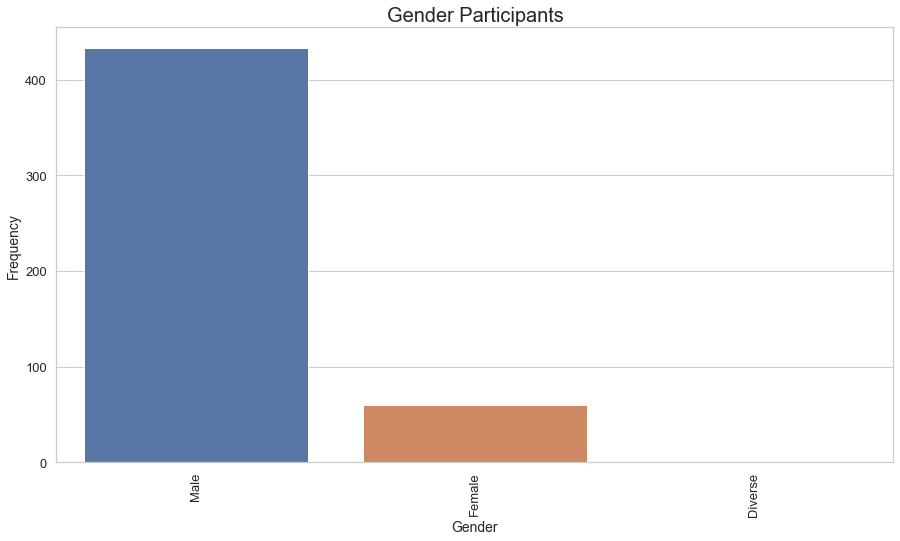

In [31]:
# Using count plot
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df,x='gender')
plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Gender",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequency",fontsize=14)
plt.title("Gender Participants",fontsize=20)
plt.show()


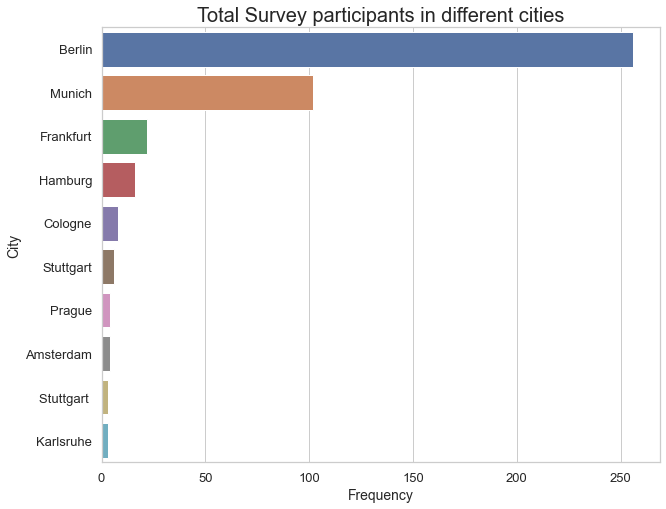

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(data=df['city'].value_counts().head(10).reset_index(),
        y='index',x='city')
plt.xticks(fontsize=13)
plt.xlabel("Frequency",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("City",fontsize=14)
plt.title("Total Survey participants in different cities",fontsize=20)
plt.show()



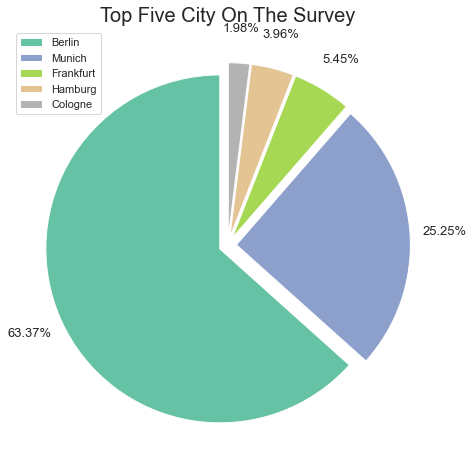

In [34]:
# Top 5 City on the survey 
plt.figure(figsize=(15,8))

df['city'].value_counts().iloc[:5].plot.pie(autopct="%1.2f%%",fontsize=13,startangle=90,labels=['']*5,
cmap='Set2',explode=[0.05] * 5,pctdistance=1.2)
plt.ylabel("")
plt.legend(loc='upper left',labels=df['city'].value_counts().iloc[:5].index)
plt.title("Top Five City On The Survey",fontsize=20)
plt.show()

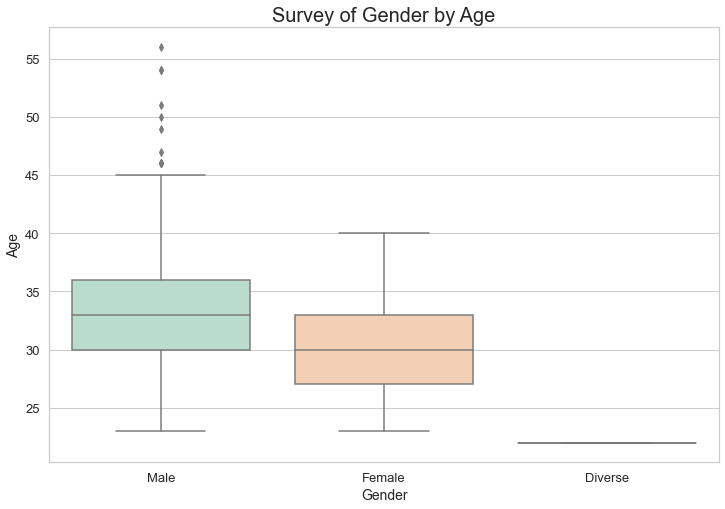

In [35]:
# Plotting the Boxplots
plt.figure(figsize=(12,8))
sns.boxplot(x='gender',y='age',data=df,palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("Gender",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Age",fontsize=14)
plt.title("Survey of Gender by Age",fontsize=20)
plt.show()

Text(0.5, 1.0, 'Different Job Position')

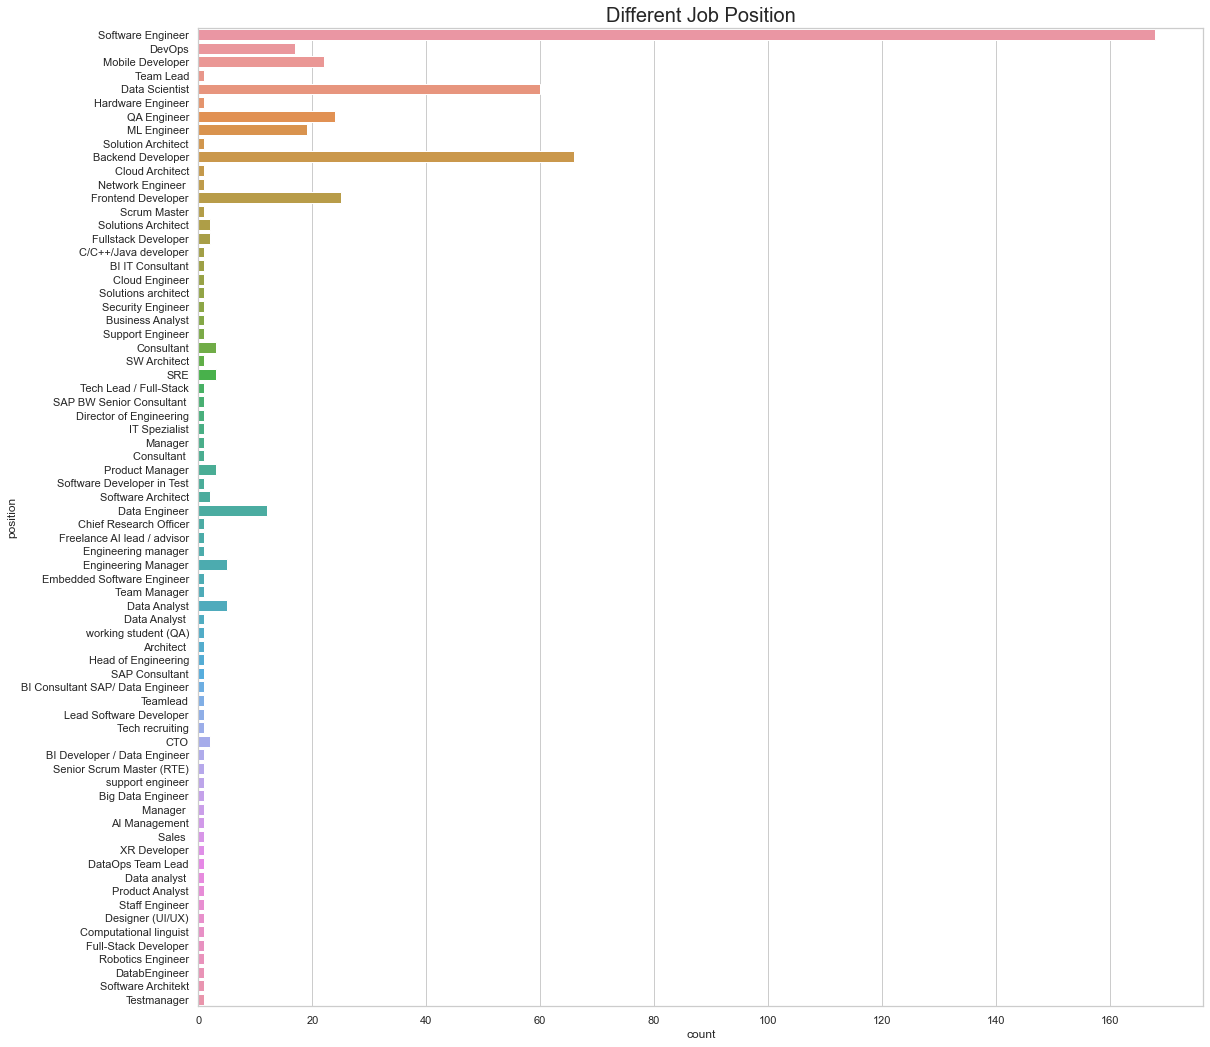

In [41]:
plt.figure(figsize=(18,18))
sns.set_style('whitegrid')
sns.countplot(y='position', data=df)
plt.title("Different Job Position",fontsize=20)


Text(0, 0.5, 'Seniority level')

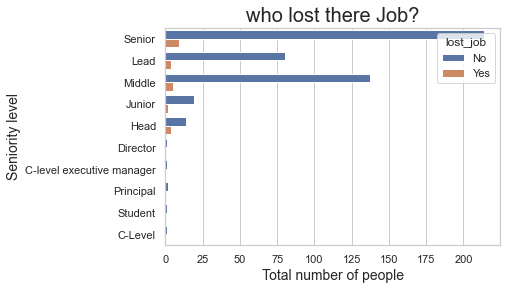

In [40]:
sns.set_style('whitegrid')
sns.countplot(y='seniority_level', hue='lost_job', data=df)
plt.title("who lost there Job?",fontsize=20)
plt.xlabel("Total number of people",fontsize=14)
plt.ylabel("Seniority level",fontsize=14)


Text(0.5, 1.0, 'Seniority level')

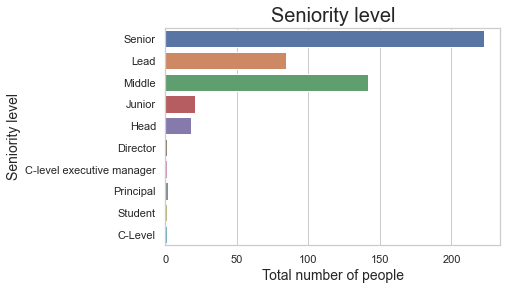

In [42]:
sns.set_style('whitegrid')
sns.countplot(y='seniority_level', data=df)
plt.xlabel("Total number of people",fontsize=14)
plt.ylabel("Seniority level",fontsize=14)
plt.title("Seniority level",fontsize=20)


In [20]:
#Modifying column name in proper format
#str.strip() will remove extra space before and after column name
#str.lower() will convert all column names to lower case
#str.replace(' ', '_') will replace '<space>' in column name by '_' due to this there will be no key error
df.columns = (df.columns.str.strip().str.lower()
              .str.replace(' ', '_')
               .str.replace('&','_'))
df.head()

,unnamed:_0,timestamp,age,gender,city,position,total_years_of_experience,years_of_experience_in_germany,seniority_level,technical_language,...,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country),vacation_days,employment_status,contract_duration,main_language,company_size,company_type,lost_job
0,0,24-11-2020,26,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,...,5000.0,75000.0,10000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,1,24-11-2020,29,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,...,120000.0,100000.0,100000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
2,2,24-11-2020,32,Male,Berlin,DevOps,5.0,1.0,Senior,"AWS, GCP, Python,K8s",...,5000.0,76000.0,5000.0,30,Full-time employee,Unlimited contract,English,Nov-50,Startup,No
3,3,24-11-2020,34,Male,Berlin,Mobile Developer,11.0,5.0,Lead,kotlin,...,80000.0,75000.0,75000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
4,4,24-11-2020,38,Male,Berlin,Team Lead,18.0,4.0,Lead,iOS,...,4000.0,80000.0,2000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,Yes


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 22 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   unnamed:_0                                                                     494 non-null    int64  
 1   timestamp                                                                      494 non-null    object 
 2   age                                                                            494 non-null    int64  
 3   gender                                                                         494 non-null    object 
 4   city                                                                           494 non-null    object 
 5   position                                                                       494 non-null    object 
 6   total_years_of_experience 

In [23]:
#Cleaning up euro sign to convert data type of "yearly_brutto_salary" from object to float
df['yearly_brutto_salary'] = df['yearly_brutto_salary'].replace({'\€': '',',':''}, regex=True).astype(float)

In [24]:
#Cleaning up "euro sign (€)","comma (,)" and " bvg only " to convert data type of "bonus+stocks" from object to float for better understanding.
#As the column is for "bonus + stocks" which is basically numeric values and we are not able to identify what " bvg only " means in one row of the column so we are removing.
df['bonus+stocks'] = df['bonus+stocks'].replace({'\€':'',',':'',' bvg only ':''}, regex=True)
df['bonus+stocks'] = pd.to_numeric(df['bonus+stocks'])



In [25]:
#Cleaning up "euro sign (€)" and "comma (,)"  to convert data type of "annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country)" from object to float for better understanding.
df['annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country)'] = df['annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country)'].replace({'\€':'',',':''}, regex=True)
df['annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country)'] = pd.to_numeric(df['annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country)'])


In [26]:
#Cleaning up "euro sign (€)","comma (,)" and " learning budget bvg gym food " to convert data type of "bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country)" from object to float for better understanding.
#As whole column is for numeric values and we are not able to identify what " learning budget bvg gym food " means in one row of the column so we are removing.
df['bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country)'] = df['bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country)'].replace({'\€':'',',':'',' learning budget bvg gym food ':''}, regex=True)
df['bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country)'] = pd.to_numeric(df['bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country)'])



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 22 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   unnamed:_0                                                                     494 non-null    int64  
 1   timestamp                                                                      494 non-null    object 
 2   age                                                                            494 non-null    int64  
 3   gender                                                                         494 non-null    object 
 4   city                                                                           494 non-null    object 
 5   position                                                                       494 non-null    object 
 6   total_years_of_experience 

In [28]:
df.describe()

,unnamed:_0,age,total_years_of_experience,years_of_experience_in_germany,yearly_brutto_salary,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country)
count,494.000000,494.000000,494.000000,494.000000,494.000000,345.000000,493.000000,319.000000
mean,246.500000,32.925101,9.288057,4.340688,75324.858300,28316.249652,67279.223124,31192.404389
std,142.749781,5.348737,5.692242,3.710260,42015.866759,35783.445320,21406.825148,33498.983196
min,0.000000,22.000000,0.000000,0.000000,12000.000000,12.000000,11000.000000,100.000000
25%,123.250000,29.000000,5.000000,2.000000,60000.000000,5000.000000,55000.000000,5000.000000
50%,246.500000,33.000000,9.000000,3.500000,72000.000000,10000.000000,66000.000000,12000.000000
75%,369.750000,36.000000,13.000000,5.750000,83000.000000,46000.000000,77000.000000,59000.000000
max,493.000000,56.000000,31.000000,30.000000,850000.000000,200000.000000,200000.000000,200000.000000


In [29]:
#To make changes in CSV
df.to_csv('ITSalarySurveyEU.csv')

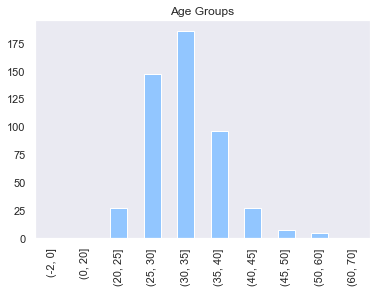

In [170]:
# add also binned version of age to data frame
df['AgeGroup'] = pd.cut(df.age, bins=[-2,0,20,25,30,35,40,45,50,60,70])
df.AgeGroup.value_counts().sort_index().plot(kind='bar')
plt.title('Age Groups')
plt.grid()
plt.show()

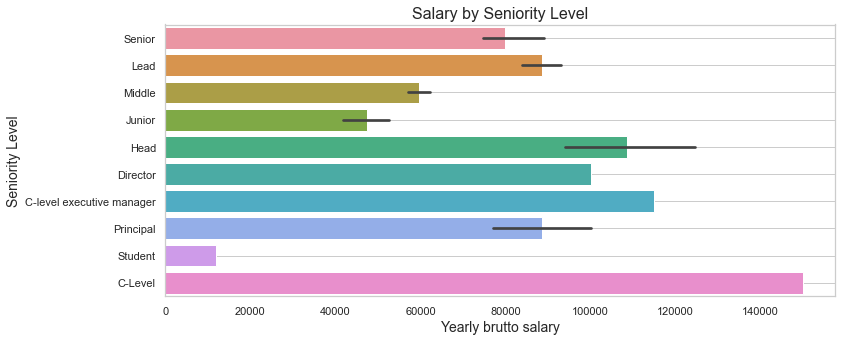

In [8]:
# below barplot shows dependency of salary on the following feature:
my_features = ['seniority_level']

for f in my_features:
    plt.style.use('seaborn-pastel')
    plt.figure(figsize=(12,5))
    sns.barplot(data=df, y=f, x='yearly_brutto_salary')
    plt.grid()
    plt.title("Salary by Seniority Level",fontsize=16)
    plt.ylabel("Seniority Level",fontsize=14)
    plt.xlabel("Yearly brutto salary",fontsize=14)
    plt.show()

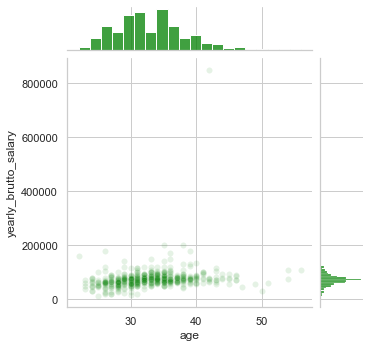

In [106]:
# alternative visualization: scatterplot salary vs age
sns.jointplot(x=df['age'], y=df['yearly_brutto_salary'],
              height=5, color='green',
              joint_kws={'alpha' : 0.1})
plt.show()

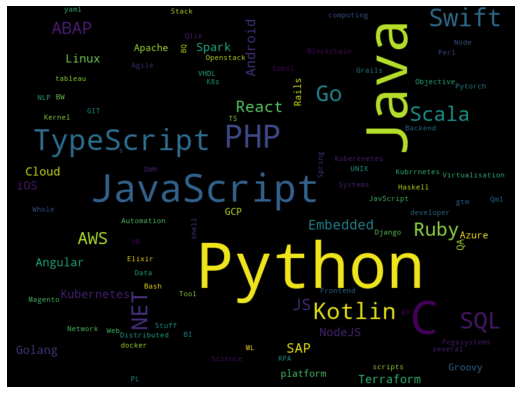

In [136]:
# create wordcloud fpr main tech/progamming language
f = 'technical_language'
text_select = df[f][df[f] != '_MISSING_']
text = " ".join(txt for txt in text_select)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=500,
                      width = 800, height = 600,
                      background_color='black').generate(text)

plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [140]:
# select Software Engineer only
df_ds = df[df.position=='Software Engineer'].copy()
df_ds.head()

,Unnamed: 0,unnamed:_0,timestamp,age,gender,city,position,total_years_of_experience,years_of_experience_in_germany,seniority_level,...,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country),vacation_days,employment_status,contract_duration,main_language,company_size,company_type,lost_job
0,0,0,24-11-2020,26,Male,Munich,Software Engineer,5.0,3.0,Senior,...,5000.0,75000.0,10000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,1,1,24-11-2020,29,Male,Berlin,Software Engineer,12.0,6.0,Lead,...,120000.0,100000.0,100000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
6,6,6,24-11-2020,30,Male,Berlin,Software Engineer,6.0,3.0,Senior,...,15000.0,54000.0,54000.0,27,Full-time employee,Unlimited contract,English,1000+,Product,No
7,7,7,24-11-2020,34,Male,Munich,Software Engineer,13.0,3.0,Lead,...,72000.0,60000.0,60000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
8,8,8,24-11-2020,45,Male,Schleswig-Holstein,Software Engineer,26.0,18.0,Senior,...,10000.0,93000.0,11000.0,30,Full-time employee,Unlimited contract,German,1000+,Product,No


In [141]:
# select Backend Developer only
df_ds = df[df.position=='Backend Developer'].copy()
df_ds.head()

,Unnamed: 0,unnamed:_0,timestamp,age,gender,city,position,total_years_of_experience,years_of_experience_in_germany,seniority_level,...,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country),vacation_days,employment_status,contract_duration,main_language,company_size,company_type,lost_job
19,19,19,24-11-2020,37,Male,Munich,Backend Developer,12.0,4.0,Senior,...,5000.0,60000.0,5000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
22,22,22,24-11-2020,30,Male,Berlin,Backend Developer,6.0,2.0,Senior,...,75000.0,65000.0,65000.0,30,Full-time employee,Unlimited contract,English,101-1000,Product,No
28,28,28,24-11-2020,28,Male,Munich,Backend Developer,6.0,5.0,Senior,...,2000.0,57000.0,1500.0,30,Full-time employee,Unlimited contract,English,101-1000,Consulting / Agency,No
31,31,31,24-11-2020,36,Male,Berlin,Backend Developer,18.0,1.0,Senior,...,70000.0,60000.0,60000.0,26,Full-time employee,Unlimited contract,English,101-1000,Product,No
48,48,48,24-11-2020,33,Male,Munich,Backend Developer,15.0,3.0,Lead,...,10000.0,98000.0,101.0,30,Full-time employee,Unlimited contract,English,Nov-50,Startup,No


In [142]:
# select data scientists only
df_ds = df[df.position=='Data Scientist'].copy()
df_ds.head()

,Unnamed: 0,unnamed:_0,timestamp,age,gender,city,position,total_years_of_experience,years_of_experience_in_germany,seniority_level,...,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country),vacation_days,employment_status,contract_duration,main_language,company_size,company_type,lost_job
5,5,5,24-11-2020,33,Male,Berlin,Data Scientist,5.0,4.0,Lead,...,80000.0,81000.0,4000.0,24,Full-time employee,Unlimited contract,English,1000+,Product,No
10,10,10,24-11-2020,26,Female,Munich,Data Scientist,6.0,2.0,Middle,...,10000.0,60000.0,60000.0,26,Full-time employee,Unlimited contract,English,1000+,Product,No
11,11,11,24-11-2020,24,Male,Berlin,Data Scientist,4.0,2.0,Senior,...,73000.0,50000.0,50000.0,24,Full-time employee,Unlimited contract,English,101-1000,Startup,No
15,15,15,24-11-2020,26,Male,Munich,Data Scientist,3.0,2.0,Middle,...,7000.0,52000.0,300.0,30,Full-time employee,Unlimited contract,English,101-1000,Product,No
32,32,32,24-11-2020,31,Male,Berlin,Data Scientist,10.0,5.0,Lead,...,70000.0,115000.0,60000.0,28,Full-time employee,Unlimited contract,English,1000+,Product,No


In [143]:
# select Frontend Developer only
df_ds = df[df.position=='Frontend Developer'].copy()
df_ds.head()

,Unnamed: 0,unnamed:_0,timestamp,age,gender,city,position,total_years_of_experience,years_of_experience_in_germany,seniority_level,...,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country),vacation_days,employment_status,contract_duration,main_language,company_size,company_type,lost_job
27,27,27,24-11-2020,31,Male,Berlin,Frontend Developer,10.0,1.5,Senior,...,101.0,67500.0,101.0,28,Full-time employee,Unlimited contract,English,51-100,Startup,No
68,68,68,24-11-2020,35,Female,Berlin,Frontend Developer,12.0,5.0,Middle,...,NaN,70000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,E-commerce,No
69,69,69,24-11-2020,34,Male,Berlin,Frontend Developer,10.0,3.0,Senior,...,NaN,68000.0,NaN,40,Full-time employee,Unlimited contract,English,Nov-50,Startup,No
75,75,75,24-11-2020,30,Male,Munich,Frontend Developer,9.0,3.0,Middle,...,NaN,64000.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No
111,111,111,24-11-2020,24,Male,Frankfurt,Frontend Developer,3.0,0.0,Middle,...,3000.0,44000.0,NaN,26,Full-time employee,Unlimited contract,English,51-100,Product,No


In [144]:
# select QA Engineer only
df_ds = df[df.position=='QA Engineer'].copy()
df_ds.head()

,Unnamed: 0,unnamed:_0,timestamp,age,gender,city,position,total_years_of_experience,years_of_experience_in_germany,seniority_level,...,bonus+stocks,annual_brutto_salary_one_year_ago(only_answer_if_staying_in_the_same_country),bonus+stocks_one_year_ago(only_answer_if_staying_in_same_country),vacation_days,employment_status,contract_duration,main_language,company_size,company_type,lost_job
13,13,13,24-11-2020,27,Male,Munich,QA Engineer,5.0,1.0,Senior,...,5800.0,58000.0,101.0,30,Full-time employee,Unlimited contract,English,1000+,Product,No
21,21,21,24-11-2020,34,Male,Berlin,QA Engineer,10.0,4.0,Senior,...,3000.0,65000.0,3000.0,28,Full-time employee,Unlimited contract,English,101-1000,Startup,No
30,30,30,24-11-2020,46,Male,Munich,QA Engineer,13.0,13.0,Senior,...,8500.0,70000.0,8500.0,28,Full-time employee,Unlimited contract,German,101-1000,Product,No
34,34,34,24-11-2020,30,Female,Berlin,QA Engineer,5.0,3.0,Middle,...,4000.0,50000.0,4000.0,30,Full-time employee,Unlimited contract,German,101-1000,Product,No
41,41,41,24-11-2020,36,Female,Berlin,QA Engineer,14.0,7.0,Lead,...,6900.0,63000.0,6300.0,30,Full-time employee,Unlimited contract,English,Nov-50,Product,No


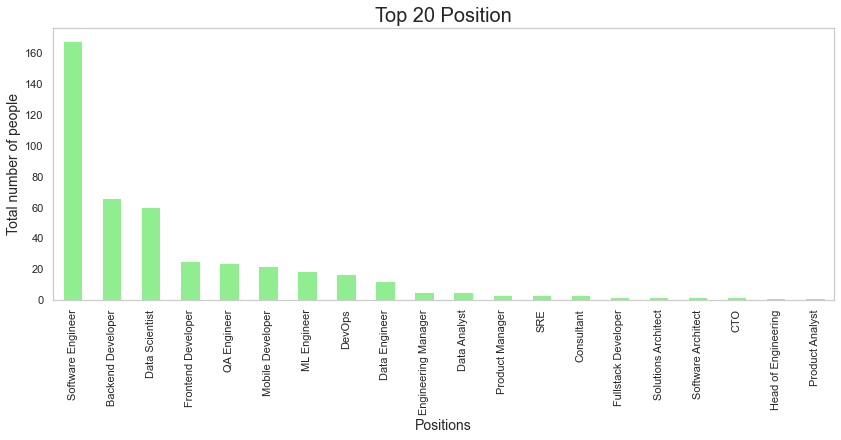

In [33]:
features_cat = ['position']
# plot distributions of categorical features
for f in features_cat:
    plt.figure(figsize=(14,5))
    val_c = df[f].value_counts()
    if len(val_c) <= 20:
        val_c.plot(kind='bar', color='lightgreen')
        plt.title(f)
    else: # if more than 20 levels show only the most frequent 20
        val_c[0:20].plot(kind='bar', color='lightgreen')
        plt.title('Top 20 Position',fontsize=20)
        plt.xlabel('Positions',fontsize=14)
        plt.ylabel('Total number of people',fontsize=14)
    plt.grid()
    plt.show()

Text(0.5, 1.0, 'Position by age')

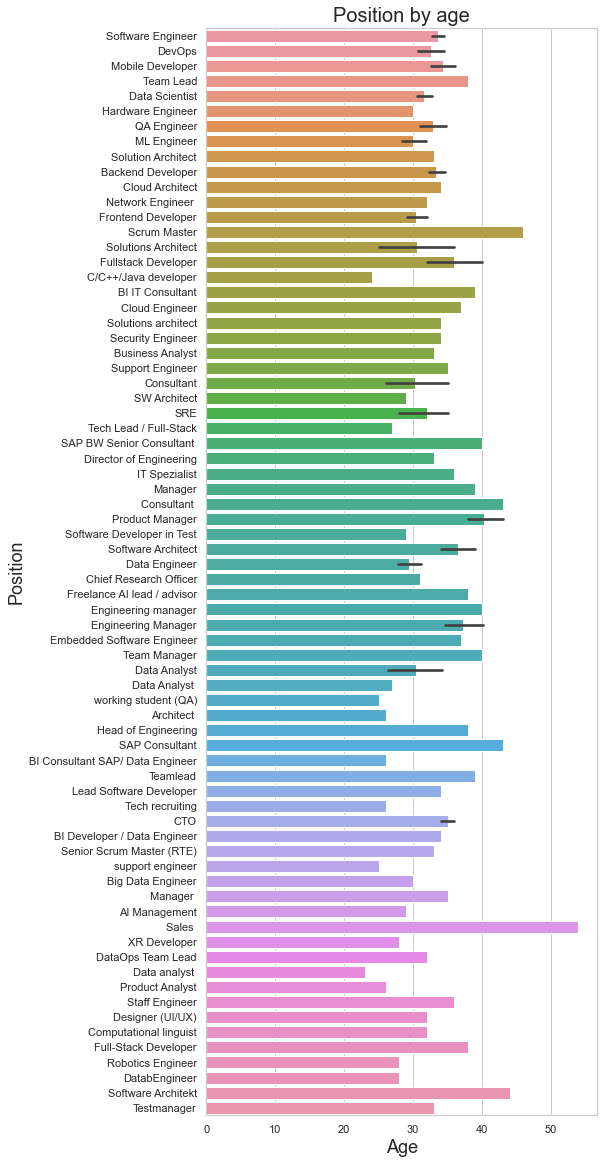

In [199]:
sns.set_style('whitegrid')
sns.barplot(y='position', x='age', data=df)
sns.set_theme({'figure.figsize':(7,10)})
plt.xlabel("Age",fontsize=18)
plt.ylabel("Position",fontsize=18)
plt.title("Position by age",fontsize=20)

Text(0.5, 1.0, 'Seniority level by total years of experience')

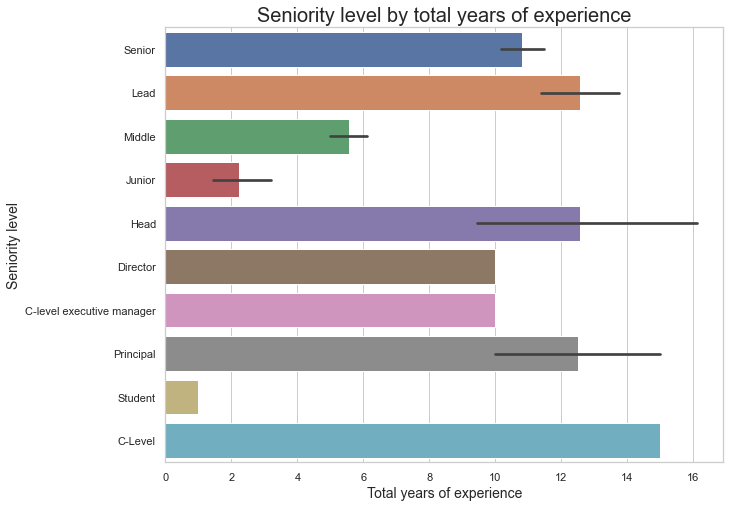

In [72]:
sns.set_style('whitegrid')
sns.barplot(x='total_years_of_experience', y='seniority_level', data=df)
plt.xlabel("Total years of experience",fontsize=14)
plt.ylabel("Seniority level",fontsize=14)
plt.title("Seniority level by total years of experience",fontsize=20)

Text(0.5, 1.0, 'Seniority level')

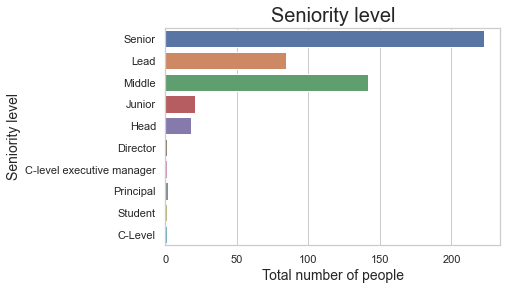

In [5]:
sns.set_style('whitegrid')
sns.countplot(y='seniority_level', data=df)
plt.xlabel("Total number of people",fontsize=14)
plt.ylabel("Seniority level",fontsize=14)
plt.title("Seniority level",fontsize=20)

Text(0.5, 0, 'City')

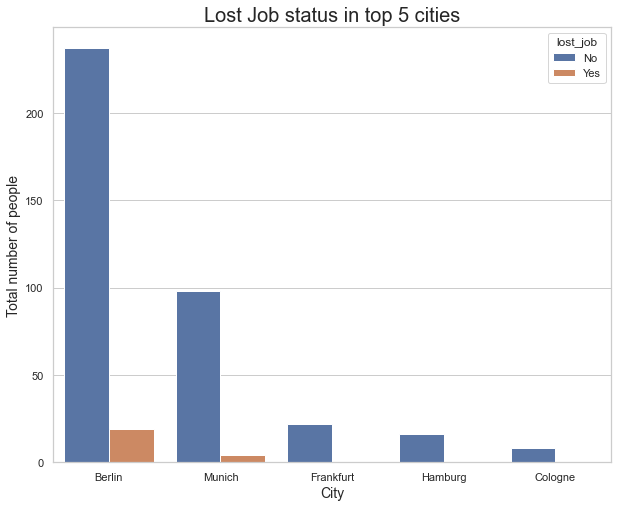

In [74]:
sns.set_style('whitegrid')
sns.countplot(x='city', hue='lost_job', data=df,order=pd.value_counts(df['city']).iloc[:5].index)
sns.set(rc = {'figure.figsize':(10,8)})
plt.title("Lost Job status in top 5 cities",fontsize=20)
plt.ylabel("Total number of people",fontsize=14)
plt.xlabel("City",fontsize=14)